In [1]:
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df =  pd.read_csv("spacer.csv")


In [5]:
df.drop(['objid','specobjid'], axis=1, inplace=True)
df.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
le = LabelEncoder().fit(df['class'])
df['class'] = le.transform(df['class'])
df.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,2.000000,5.353854,8410.000000,57481.000000,1000.000000


In [10]:
X = df.drop('class', axis=1)
y = df['class']

In [11]:
X


,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,0.014019,447,51877,229


In [13]:
y

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [15]:
X

array([[ 0.16745842, -0.58492272,  1.03148637, ...,  1.03148936,
         1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, ..., -0.63621258,
        -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796, ..., -0.65633905,
        -0.60919097,  0.77527888],
       ...,
       [-0.92039468,  1.46090664,  0.16753826, ...,  3.26608697,
         2.69309363,  1.3036668 ],
       [-0.92197294,  1.46432109,  0.31801835, ..., -0.56688806,
        -0.70581092, -0.60143828],
       [-0.91804124,  1.46639319,  0.79229193, ..., -0.56688806,
        -0.70581092, -0.5820479 ]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=238)


In [22]:
from collections import Counter as counter
c = counter(list(df['class']))

In [23]:
c


Counter({2: 4152, 0: 4998, 1: 850})

<Axes: xlabel='class', ylabel='count'>

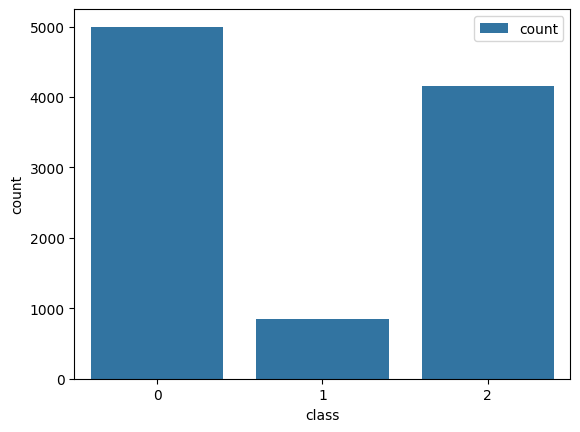

In [26]:
sns.countplot(x=df['class'], label="count")


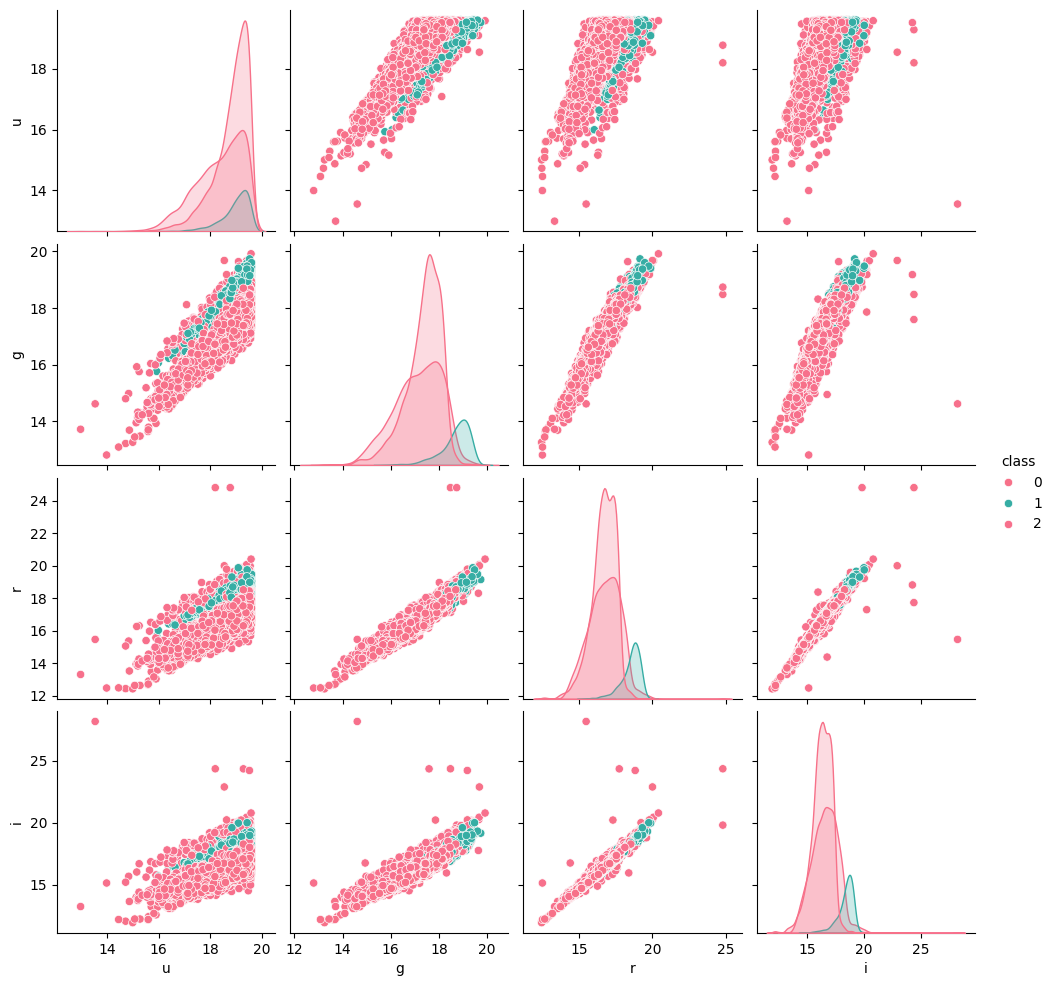

In [30]:
sns.pairplot(df[['u','g','r','i','class']] ,hue='class', palette='husl')


In [31]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)
LRClassifer = LogisticRegression()
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)


In [33]:
dtClassifer.fit(X_train, y_train)
LRClassifer.fit(X_train, y_train)
NeNeClassifier.fit(X_train, y_train)
y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [35]:
y_preds , y

(array([0, 2, 1, ..., 0, 2, 2]),
 0       2
 1       2
 2       0
 3       2
 4       2
        ..
 9995    0
 9996    0
 9997    2
 9998    0
 9999    0
 Name: class, Length: 10000, dtype: int64)

In [41]:
from sklearn.metrics import classification_report
targets = ['0', '1', '2']

In [42]:
classification_report(y_preds,y_test,target_names=targets)
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [44]:
print("DECISION TREE")
print(classification_report(y_preds,y_test,target_names=target_names) + '\n')
print("LINEAR REGRESSION")
print(classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("K NEAREST NEIGHBORS")
print(classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1480
           1       0.93      0.96      0.95       252
           2       1.00      0.99      1.00      1268

    accuracy                           0.99      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1449
           1       0.94      0.97      0.96       254
           2       0.99      0.97      0.98      1297

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1584
           1       0.86      0.96      0.91       234
           2       0.88      0.94      0.91      1182

    accuracy      